# Random Forest

**Improving on Decision Trees**

The main drawback of decision trees are that they have a tendency to overfit. We mitigate this by improving their performance through pruning. We can also use decision trees to make a better model;

Decision Trees are very susceptible to random idiosyncrasies in the training dataset. We say that Decision Trees have high variance since if you randomly change the training dataset, you may end up with a very different looking tree.

One of the advantages of decision trees over a model like logistic regression is that they make no assumptions about how the data is structured. In logistic regression, we assume that we can draw a line to split the data. Sometimes our data just isn’t structured like that. A decision tree has the potential to get at the essence of the data no matter how it is structured.

We will be learning about random forests in this module, which as you may guess from the name, is a model built with multiple trees. The goal of random forests is to take the advantages of decision trees while mitigating the variance issues.

A random forest is an example of an ensemble because it uses multiple machine learning models to create a single model.

**Bootstrapping**

A bootstrapped sample is a random sample of datapoints where we randomly select with replacement datapoints from our original dataset to create a dataset of the same size. Randomly selecting with replacement means that we can choose the same datapoint multiple times. This means that in a bootstrapped sample, some datapoints from the original dataset will appear multiple times and some will not appear at all.

For example if we have four datapoints A, B, C, D, these could be 3 resamples:

    A, A, B, C
    B, B, B, D
    A, A, C, C

We would rather be able to get more samples of data from the population, but as all we have is our training set, we use that to generate additional datasets.

We use bootstrapping to mimic creating multiple samples.

**Bagging Decision Trees**

Bootstrap Aggregation (or Bagging) is a technique for reducing the variance in an individual model by creating an ensemble from multiple models built on bootstrapped samples.

To bag decision trees, we create multiple (say 10) bootstrapped resamples of our training dataset. So if we have 100 datapoints in our training set, each of the resamples will have 100 datapoints randomly chosen from our training set. Recall that we randomly select with replacement, meaning that some datapoints will appear multiple times and some not at all.

We create a decision tree with each of these 10 resamples.

To make a prediction, we make a prediction with each of the 10 decision trees and then each decision tree gets a vote. The prediction with the most votes is the final prediction.

When we bootstrap the training set, we're trying to wash out the variance of the decision tree. The average of several trees that have different training sets will create a model that more accurately gets at the essence of the data.

**Decorrelate the Trees**

With bagged decision trees, the trees may still be too similar to have fully created the ideal model. They are built on different resamples, but they all have access to the same features. Thus we will add some restrictions to the model when building each decision tree so the trees have more variation. We call this decorrelating the trees.

When building a decision tree, at every node, we compare all the split thresholds for each feature to find the single best feature & split threshold. 

In a decision tree for a random forest, at each node, we randomly select a subset of the features to consider. This will result in us choosing a good, but not the best, feature to split on at each step. It’s important to note that the random selection of features happens at each node. So maybe at the first node we consider the Sex and Fare features and then at the second node, the Fare and Age features.

A standard choice for the number of features to consider at each split is the square root of the number of features. So if we have 9 features, we will consider 3 of them at each node (randomly chosen).

If we bag these decision trees, we get a random forest.

Each decision tree within a random forest is probably worse than a standard decision tree. But when we average them we get a very strong model!

# Random Forests with Sklearn

In [24]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer

cancer_data = load_breast_cancer()
df = pd.DataFrame(cancer_data['data'], columns=cancer_data['feature_names'])
df['target'] = cancer_data['target']

X = df[cancer_data.feature_names].values
y = df['target'].values
print('data dimensions', X.shape)

data dimensions (569, 30)


In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 101)

rf= RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [26]:
first_row = X_test[0]

print("prediction:", rf.predict([first_row]))
print("true value:", y_test[0])

prediction: [1]
true value: 1


We use the model to make a prediction. 

     We take the first row of the test set and see what the prediction is. 
     The predict method takes an 2D array of points, so even when we have just one point, we have to put it in a list
     These results mean that the model predicted that the lump was cancerous and that was correct.


In [27]:
#using the score method to calculate the accuracy over the whole test set.

print("Random Forest Accuracy:", rf.score(X_test, y_test))

Random Forest Accuracy: 0.965034965034965


# Tuning a Random Forest

**Random Forest Parameters**

Since a random forest is made up of decision trees, we have all the same tuning parameters for prepruning as we did for decision trees: max_depth, min_samples_leaf, and max_leaf_nodes.

With random forests, it is generally not important to tune these as overfitting is generally not an issue.


New tuning parameters: 

      n_estimators (the number of trees) and
      max_features (the number of features to consider at each split).

The default for the max features is the square root of p, where p is the number of features (or predictors). The default is generally a good choice for max features and we usually will not need to change it, but you can set it to a fixed number with the following code.
  
      rf = RandomForestClassifier(max_features=5)
      
The default number of estimators (decision trees) is 100. This often works well but may in some cases be too small. You can set it to another number as follows

     rf = RandomForestClassifier(n_estimators=15)
     
     
**Grid Search**

As is in the Decision Tree module, scikit-learn has built in a Grid Search class to help us find the optimal choice of parameters.

We need to define the parameter grid of the parameters we want to vary and give a list of the values to try.

     param_grid = {
    'n_estimators': [10, 25, 50, 75, 100],}

In [28]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [10, 25, 50, 75, 100]}

rf1 = RandomForestClassifier(random_state = 123)
gs = GridSearchCV(rf1, param_grid, scoring = 'f1', cv = 5)

gs.fit(X, y)
print("best params:", gs.best_params_)

best params: {'n_estimators': 25}


we've used the fit method to run the grid search. The best parameters will be stored in the best_params_ attribute.

On defaultthe parameters returned are those that yield the highest accuracy as that is the default metric. 

You may get slightly different results each time you run this as the random split in the 5 folds may affect which has the best accuracy score. To avoid outputting a different best parameter each time, we set the random_state in the classifier.

Accuracy will work okay for us in this case as the classes in the breast cancer dataset are reasonably balanced. If the classes are imbalanced, we would want to use an alternative metric, like the f1-score (as we've done), by changing scoring(metric) parameter to "f1" 




# Elbow Graph

With a parameter like the number of trees in a random forest, increasing the number of trees will never hurt performance. Increasing the number trees will increase performance until a point where it levels out.

The more trees, however, the more complicated the algorithm. A more complicated algorithm is more resource intensive to use. Generally it is worth adding complexity to the model if it improves performance but we do not want to unnecessarily add complexity.

We use an **Elbow Graph** to find the sweet spot. Elbow Graph is a model that optimizes performance without adding unnecessary complexity.

In [29]:
n_estimators = list(range(1, 101))

param_grid = {'n_estimators': n_estimators}

rf2 = RandomForestClassifier(random_state = 123)
gs2 = GridSearchCV(rf2, param_grid, cv = 5)
gs2.fit(X,y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=123),
             param_grid={'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30, ...]})

To find the optimal value, we do a Grid Search trying all the values from 1 to 100 for n_estimators.

Instead of just looking at the best params, we are going to use the entire result from the grid search. 

The values are located in the cv_results_ attribute. This is a dictionary with a lot of data, however, we will only need one of the keys: mean_test_score. We pull out these values and store them as a variable.

In [30]:
scores = gs2.cv_results_['mean_test_score']
scores 

array([0.90506133, 0.91386431, 0.94027325, 0.94199658, 0.9561093 ,
       0.95081509, 0.95961807, 0.95609377, 0.95960255, 0.95960255,
       0.96311132, 0.9648657 , 0.96489676, 0.96314237, 0.9719143 ,
       0.96488123, 0.97015991, 0.96840553, 0.97015991, 0.96840553,
       0.96840553, 0.96840553, 0.97015991, 0.96840553, 0.97015991,
       0.9719143 , 0.97014439, 0.97014439, 0.96839   , 0.97365316,
       0.97189877, 0.96662009, 0.97014439, 0.9648657 , 0.9648657 ,
       0.96309579, 0.96662009, 0.96835895, 0.96660456, 0.96485018,
       0.9648657 , 0.96662009, 0.96662009, 0.96309579, 0.96309579,
       0.96309579, 0.9648657 , 0.96311132, 0.9648657 , 0.9648657 ,
       0.9648657 , 0.96485018, 0.96309579, 0.96309579, 0.96309579,
       0.96309579, 0.96309579, 0.96309579, 0.96309579, 0.96309579,
       0.96309579, 0.96309579, 0.96309579, 0.96309579, 0.96134141,
       0.95958702, 0.96134141, 0.95958702, 0.96134141, 0.95958702,
       0.96134141, 0.96309579, 0.96311132, 0.96134141, 0.96488

We the use matplotlib to plot the results.

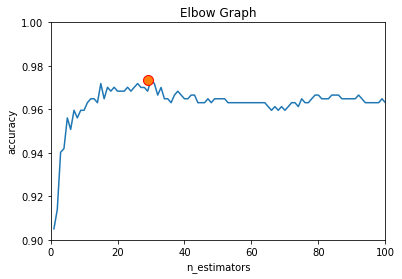

In [31]:
import matplotlib.pyplot as plt 

n_estimators = list(range(1,101))

#collect max datapoints
max_scores = []
scores = gs2.cv_results_['mean_test_score'].round(4)
max_score = np.max(scores)

max_point = [m for m in range(len(scores)) if scores[m] == max_score]

#Graph Info
plt.plot(n_estimators, scores)

plt.title('Elbow Graph')
plt.xlabel('n_estimators')
plt.ylabel('accuracy')

plt.xlim(0,100)
plt.ylim(0.9,1.0)

plt.plot([max_point],[max_score], marker = 'o', markersize = 10, markerfacecolor = None, markeredgecolor = 'r')

plt.show()

**code for the maximum point to be labelled**

    if len(max_point) == 1 :
        max_text='max point ['+ str(max_point[0])+','+str(max_score)+']'
        plt.annotate(text=max_text,xy=(max_point[0],max_score),xytext=(max_point[0]-10,max_score+0.01),color='r',size=10)
    else:
        max_text='max : '+str(max_score)+' ('+str(len(max_scores))+' points)'
        plt.text(30.0,0.91,max_text,c='b',size =10)

If we look at this graph, we see that around 10 trees the graph levels out. The best model occurred at n_estimators=29 but given how volatile it is, that was probably due to random chance. We choose about 10 to be our number of estimators, because we want the minimum number of estimators that still yield maximum performance.

We can build our random forest model with the optimal number of trees.

In [32]:
rffinal = RandomForestClassifier(n_estimators = 10)
rffinal.fit(X,y)

RandomForestClassifier(n_estimators=10)

Elbow graphs pop up in lots of different situations when we are adding complexity to a model and want to determine the minimal amount of complexity that will yield optimal performance.

# Feature Importances

Does every feature contribute equally to building a model?

If not, which subset of features should we use? 

This is a matter of **feature selection.**

Random forests provide a straightforward method for feature selection: **mean decrease impurity.** 

A random forest consists of many decision trees, and that for each tree, the node is chosen to split the dataset based on maximum decrease in impurity, typically either Gini impurity or entropy in classification. 

Thus for a tree, it can be computed how much impurity each feature decreases in a tree, and then for a forest, the impurity decrease from each feature can be averaged. Consider this measure a metric of importance of each feature, we then can rank and select the features according to feature importance.

Scikit-learn provides a feature_importances_ variable with the model, which shows the relative importance of each feature. The scores are scaled down so that the sum of all scores is 1.

In [33]:
rf3 = RandomForestClassifier(n_estimators = 10, random_state = 111)

rf3.fit(X_train, y_train)

ft_imp = pd.Series(rf3.feature_importances_, index = cancer_data.feature_names).sort_values(ascending = False)

ft_imp.head(10)

worst radius            0.309701
mean concave points     0.183126
worst concave points    0.115641
mean perimeter          0.064119
mean radius             0.058742
worst concavity         0.050951
radius error            0.049103
mean texture            0.017197
worst area              0.016512
mean concavity          0.014696
dtype: float64

(In above code)We find the feature importances in a random forest with n_estimator = 10 using the training dataset, and display them in the descending order.

From the output, we can see that among all features, worst radius is most important (0.31), followed by mean concave points and worst concave points.

In regression, we calculate the feature importance using variance instead.

Why should we perform feature selection? Top reasons are:

    it enables us to train a model faster;
    it reduces the complexity of a model thus makes it easier to interpret.
    And if the right subset is chosen, it can improve the accuracy of a model.
    Choosing the right subset often relies on domain knowledge, some art, and a bit of luck.
    
    

We  can try to build a model with higher importances, and see if it improves accuracy. 

The advantage of building a model using less features is more pronounced when the sample size is large.

This is because of removal of some noise(features) in the model.

Grabbing columns by name:

     worst_cols = [col for col in df.columns if 'worst' in col]
     X_worst = df[worst_cols]

# Random Forest Pros & Cons

**Performance**

Probably the biggest advantage of Random Forests is that they generally perform well without any tuning. They will also perform decently well on almost every dataset.

A linear model, for example, cannot perform well on a dataset that cannot be split with a line. It is not possible to split the following dataset with a line without manipulating the features. However, a random forest will perform just fine on this dataset.

We can see this by looking at the code below to generate the fake dataset and comparing a Logistic Regression model with a Random Forest model.
    
    The function make_circles makes a classification dataset with concentric circles. 
    We use kfold cross validation to compare the accuracy scores and see that the Logistic Regression model performs worse 
    than random guessing but the Random Forest model performs quite well.

In [38]:
from sklearn.datasets import make_circles
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression

X, y = make_circles(noise=0.2, factor=0.5, random_state=1)

kf = KFold(n_splits=5, shuffle=True, random_state=1)
lr_scores = []
rf_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    lr = LogisticRegression(solver='lbfgs')
    lr.fit(X_train, y_train)
    lr_scores.append(lr.score(X_test, y_test))
    
    rf = RandomForestClassifier(n_estimators=100)
    rf.fit(X_train, y_train)
    rf_scores.append(rf.score(X_test, y_test))
    
print("LR accuracy:", np.mean(lr_scores))
print("RF accuracy:", np.mean(rf_scores))

LR accuracy: 0.36
RF accuracy: 0.82


When looking to get a benchmark for a classification problem; 
     
     it is common practice to start by building a Logistic Regression model and a Random Forest model as these two models 
     both have potential to perform well without any tuning.
     This will give you values for your metrics to try to beat. Often times it is almost impossible to do better than these 
     benchmarks.
     

solver{‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, default=’lbfgs’ Algorithm to use in the optimization problem.

    LogisticRegression(solver='lbfgs') 

    1) For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones. 
    2) For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss; 
    3) ‘liblinear’ is limited to one-versus-rest schemes. ‘newton-cg’, ‘lbfgs’, ‘sag’ and ‘saga’ handle L2 or no penalty 
    4) ‘liblinear’ and ‘saga’ also handle L1 penalty ‘saga’ also supports ‘elasticnet’ penalty ‘liblinear’ does not support 
        setting penalty='none'

**Interpretability**

Random Forests, despite being made up of Decision Trees, are not easy to interpret. A random forest has several decision trees, each of which is not a very good model, but when averaged, create an excellent model. Thus Random Forests are not a good choice when looking for interpretability.

In most cases, interpretability is not important.

**Computation**

Random Forests can be a little slow to build, especially if you have a lot of trees in the random forest. Building a random forest involves building 10-100 (usually) decision trees. Each of the decision trees is faster to build than a standard decision tree because of how we do not compare every feature at every split, however given the quantity of decision trees it is often slow to build.

Similarly, predicting with a Random Forest will be slower than a Decision Tree since we have to do a prediction with each of the 10-100 decision trees in order to get our final prediction.